In [24]:
import pandas as pd
import numpy as np

# from scipy.cluster.vq import kmeans

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from tqdm import tqdm

import seaborn as sns

In [2]:
data = pd.read_csv("top_tf_idf_matrix.csv")
data

,name,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,St Honore Pastries,-0.006729,-0.004750,-0.005146,-0.002375,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Tuna Bar,-0.070262,-0.061950,-0.044730,-0.031667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BAP,-0.391687,-0.339832,-0.247204,-0.155764,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bar One,-0.008115,-0.009104,-0.007323,-0.003761,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DeSandro on Main,-0.374468,-0.419396,-0.211776,-0.139931,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,Stina Pizzeria,-0.098367,-0.114201,-0.068085,-0.032063,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5048,Flip-N-Pizza,-0.010688,-0.008313,-0.004552,-0.002771,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5049,Ali Baba Magic Food,-0.047699,-0.039386,-0.024542,-0.017615,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5050,Tata Cafe,-0.717269,-0.600891,-0.399208,-0.272340,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
restaurants = data["name"]

In [33]:
matrix = data.drop(["name"], axis=1).to_numpy()

In [35]:
scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(matrix)

In [39]:
pca_test = PCA()
pca_test.fit_transform(matrix)

array([[-8.28130083e-02, -6.15956083e-02, -5.49238551e-02, ...,
        -4.10128358e-20, -2.68608642e-18, -1.56365759e-20],
       [-6.04872633e-02, -4.51005226e-02, -4.10661231e-02, ...,
        -1.15985411e-19,  3.33641001e-18, -5.91261277e-20],
       [ 5.34679067e-02,  3.93888809e-02,  3.01807943e-02, ...,
         3.32641623e-22,  1.98772512e-21,  2.32196608e-22],
       ...,
       [-6.94451023e-02, -5.17401692e-02, -4.66120949e-02, ...,
        -2.63724320e-18, -1.01611900e-19, -4.53860555e-19],
       [ 1.67124341e-01,  1.24515935e-01,  1.03009860e-01, ...,
         3.32641623e-22,  1.98772512e-21,  2.32196608e-22],
       [-8.02348847e-02, -5.97092779e-02, -5.33186621e-02, ...,
        -5.68714734e-19, -4.76488928e-19, -3.24863452e-19]])

<AxesSubplot:>

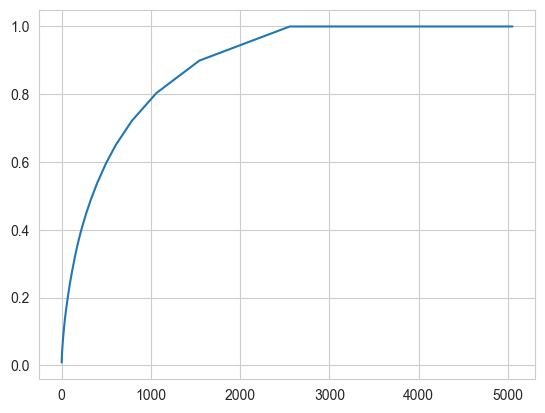

In [42]:
sns.lineplot(pca_test.explained_variance_ratio_.cumsum())

In [77]:
pca = PCA(n_components=10)
pca_matrix = pca.fit_transform(matrix)
pca_matrix

array([[-0.08282633, -0.06163396, -0.05499983, ..., -0.08418789,
         0.07517281,  0.01901118],
       [-0.06049686, -0.04512812, -0.04112337, ..., -0.05884146,
         0.05312684,  0.01404112],
       [ 0.05347868,  0.03942135,  0.0302245 , ...,  0.07673917,
        -0.06545719, -0.01274177],
       ...,
       [-0.06945619, -0.05177208, -0.04667687, ..., -0.06900958,
         0.0619569 ,  0.01602872],
       [ 0.16715741,  0.12461628,  0.10316793, ...,  0.21882954,
        -0.19156979, -0.04185675],
       [-0.08024778, -0.05974638, -0.05339248, ..., -0.0812645 ,
         0.07262332,  0.01843243]])

In [78]:

# kmeans = KMeans(n_clusters=8).fit_transform(pca_matrix)
# kmeans
k_vals = [x for x in range(2, 30)]
score = []
for k in tqdm(k_vals):
    kmeans = KMeans(n_clusters=k).fit(pca_matrix)
    score.append(kmeans.inertia_)

100%|██████████| 28/28 [00:06<00:00,  4.54it/s]


<AxesSubplot:>

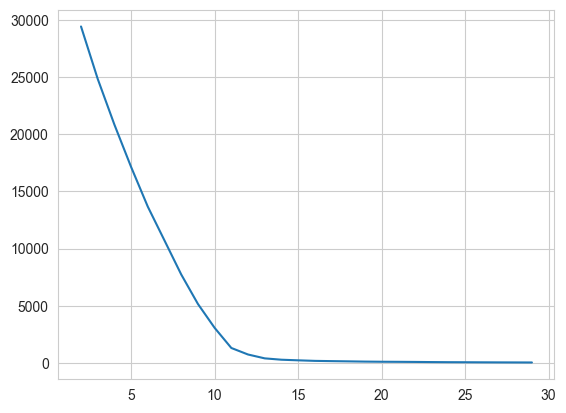

In [79]:
sns.lineplot(x=k_vals, y=score)

In [80]:
kmeans = KMeans(n_clusters=6).fit(pca_matrix)
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32),
 array([5047,    1,    1,    1,    1,    1]))

In [75]:
kmeans

KMeans(n_clusters=6)

In [56]:
restaurants

0                  St Honore Pastries
1                            Tuna Bar
2                                 BAP
3                             Bar One
4                    DeSandro on Main
                    ...              
5047                   Stina Pizzeria
5048                     Flip-N-Pizza
5049              Ali Baba Magic Food
5050                        Tata Cafe
5051    Adelita Taqueria & Restaurant
Name: name, Length: 5052, dtype: object